# Predicting Academic Achievement in Student Data

### Created By Owen Lindsay Marston Griffiths
### S3815261

## Introduction

The purpose of this project is to predict the final academic result in the subject of mathmatics at two schools with their student data using multiple linear regression. The dataset was sourced form the UCI Machine Learning Respository at http://archive.ics.uci.edu/ml/datasets/Student+Performance#

This report is organized as follows:
* [Overview](#Overview) 
* [Data Preparation](#Data-Preparation) 
* [Data Exploration](#Data-Exploration) 
* [Statistical Modeling and Performance Evaluation](#Statistical-Modeling-and-Performance-Evaluation) 
* [Summary and Conclusions](#Summary-and-Conclusions) 

## Overview 

### Data Source

There were 2 data sets provided from UCI Machine Learning Repository. We will only be looking at the file student-mat.csv. There was another data set provided and that data looked at student data in the subject of Portuguese. While our data looks at student data in mathematics. Student-mat has 395 observations with 31 descriptive features and one target feature.

### Project Objective

The objective of this project is to predict a student’s final grade in mathematics with an acceptable margin of error using multiple linear regression.

### Target Feature

The target feature of this project is G3 (final grade for the subject), which is a continuous numerical feature. Therefore it can be accepted as a regression problem.

### Descriptive Features

The variable descriptions below are from the student.txt file:

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
* 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
* 2 sex - student's sex (binary: "F" - female or "M" - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: "U" - urban or "R" - rural)
* 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
* 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary * education or 4 – higher education)
* 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
* 10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
* 11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
* 12 guardian - student's guardian (nominal: "mother", "father" or "other")
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


## Data Preparation


### Preliminaries

These are the modules we will be using to analyse our data in preparation for our linear regression

In [1]:
# Importing modules
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

Here we will be getting our data from the student-mat csv file. This file was downloaded so we will be reading the csv file.

In [2]:
# Specifying the attribute names
attributeNames = [
    'school',
    'sex',
    'age',
    'address',
    'famsize',
    'Pstatus',
    'Medu',
    'Fedu',
    'Mjob',
    'Fjob',
    'reason',
    'guardian',
    'traveltime',
    'studytime',
    'failures',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
    'famrel',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'health',
    'absences',
    'G1',
    'G2',
    'G3',
]

# Reading in the data
data = pd.read_csv("s3815261_Project.csv", sep = ';')
# Display randomly selected 10 rows
data.sample(10, random_state=999)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
123,GP,M,16,U,GT3,T,4,4,health,other,course,mother,1,1,0,no,yes,no,yes,yes,yes,yes,no,3,4,4,1,4,5,18,14,11,13
151,GP,M,16,U,LE3,T,2,1,at_home,other,course,mother,1,1,1,no,no,no,yes,yes,yes,no,yes,4,4,4,3,5,5,6,12,13,14
328,GP,F,17,U,GT3,T,4,4,teacher,services,course,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,no,5,4,4,1,3,4,7,10,9,9
187,GP,M,16,U,LE3,T,2,1,other,other,course,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,4,2,3,1,2,5,0,15,15,15
156,GP,M,17,R,LE3,T,1,2,other,other,reputation,mother,1,1,0,no,no,no,no,yes,yes,no,no,2,2,2,3,3,5,8,16,12,13
361,MS,M,18,R,LE3,T,1,1,at_home,other,other,mother,2,2,1,no,no,no,yes,no,no,no,no,4,4,3,2,3,5,2,13,12,12
373,MS,F,17,R,GT3,T,1,2,other,other,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,3,5,5,1,3,1,14,6,5,5
278,GP,F,18,U,GT3,T,4,4,health,health,reputation,father,1,2,1,yes,yes,no,yes,yes,yes,yes,yes,2,4,4,1,1,4,15,9,8,8
222,GP,F,16,U,GT3,T,2,3,services,teacher,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,2,3,1,1,1,3,2,16,16,17
243,GP,M,16,U,GT3,T,4,4,services,services,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,5,3,2,1,2,5,0,13,12,12


## Data Cleaning and Transformation

We'll have a check to see if the data set matches the data types in the documentation for the data

In [3]:
print(f"Shape of the dataset is {data.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(data.dtypes)

Shape of the dataset is (395, 33) 

Data types are below where 'object' indicates a string type: 
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


Fortunately, the data has been interpreted correctly and matches the data documentation

## Checking For Missing Values

In this section, we will check if the data contains any missing information, or categories.

In [4]:
print(f"\nNumber of missing values for each feature:")
print(data.isnull().sum())


Number of missing values for each feature:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


We can see that there are no missing values in any of the fields for the data. Therefore, we do not need to concern ourselves with missing data since that has been already handled.

In [5]:
print(data.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


## Summary Statistics

In [6]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
data.describe(include='int64')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
data.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## Categorical Features

Let's check the values in the categorical columns.

In [8]:
categoricalColumns = data.columns[data.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(data[col].unique())
    print('')

Unique values for school
['GP' 'MS']

Unique values for sex
['F' 'M']

Unique values for address
['U' 'R']

Unique values for famsize
['GT3' 'LE3']

Unique values for Pstatus
['A' 'T']

Unique values for Mjob
['at_home' 'health' 'other' 'services' 'teacher']

Unique values for Fjob
['teacher' 'other' 'services' 'health' 'at_home']

Unique values for reason
['course' 'other' 'home' 'reputation']

Unique values for guardian
['mother' 'father' 'other']

Unique values for schoolsup
['yes' 'no']

Unique values for famsup
['no' 'yes']

Unique values for paid
['no' 'yes']

Unique values for activities
['no' 'yes']

Unique values for nursery
['yes' 'no']

Unique values for higher
['yes' 'no']

Unique values for internet
['no' 'yes']

Unique values for romantic
['no' 'yes']



In [9]:
categoricalColumns = data.columns[data.dtypes==object].tolist()
for col in categoricalColumns:
    data[col] = data[col].str.strip()

In [10]:
for col in categoricalColumns:
    data[col] = data[col].str.replace('-', '_')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Data Exploration

Our dataset is now clean and we can now have a look at the data and create some visualisation and statistical modeling.

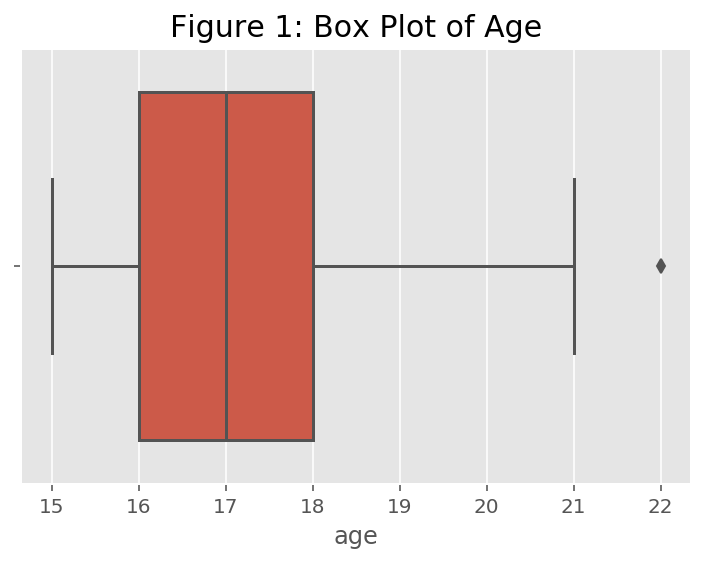

In [11]:
# get a box plot of age
sns.boxplot(data['age']).set_title('Figure 1: Box Plot of Age', fontsize = 15)
plt.show();

Here we have a box plot of the age of the students in the data

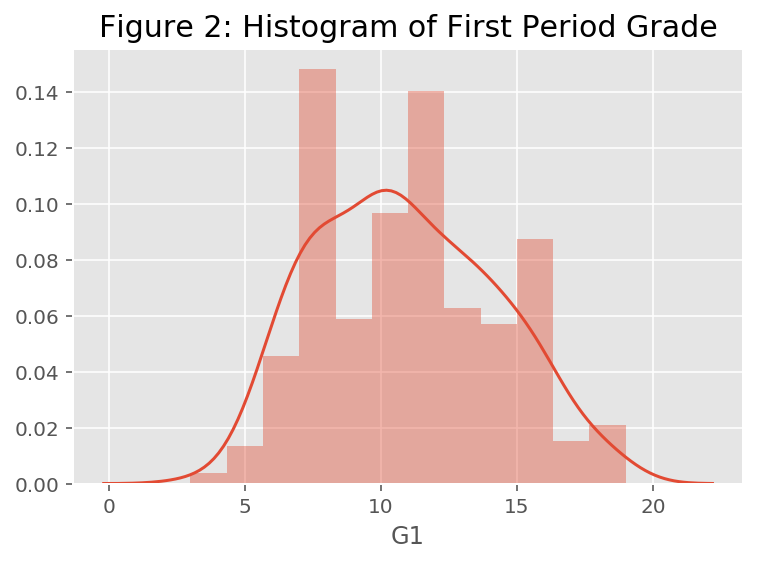

In [12]:
# get a histogram of first period grade with kernel density estimate
sns.distplot(data['G1'], kde = True).set_title('Figure 2: Histogram of First Period Grade', fontsize = 15)
plt.show();

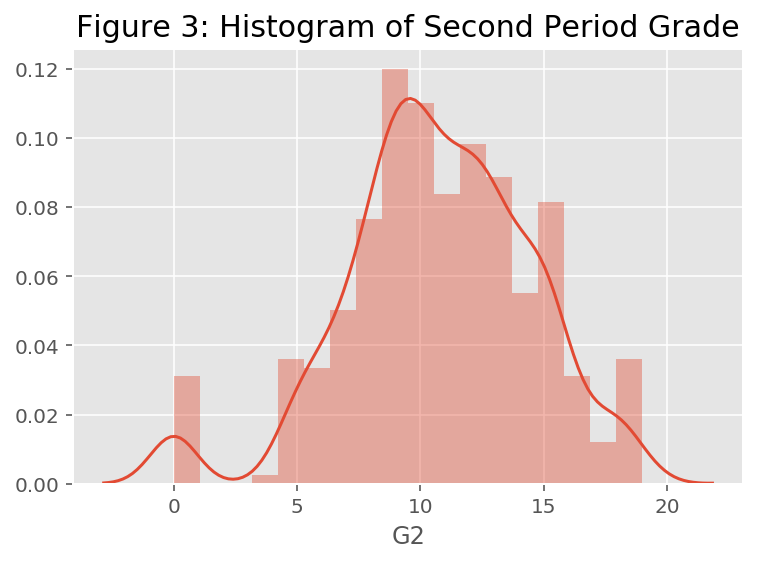

In [13]:
# get a histogram of second period grade with kernel density estimate
sns.distplot(data['G2'], kde = True).set_title('Figure 3: Histogram of Second Period Grade', fontsize = 15)
plt.show();

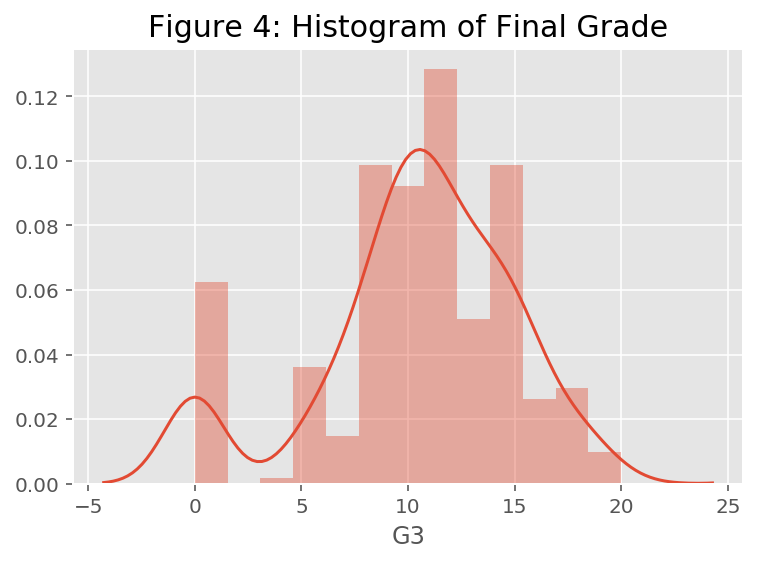

In [14]:
# get a histogram of final grade with kernel density estimate
sns.distplot(data['G3'], kde = True).set_title('Figure 4: Histogram of Final Grade', fontsize = 15)
plt.show();

## Multivariate Visualisation

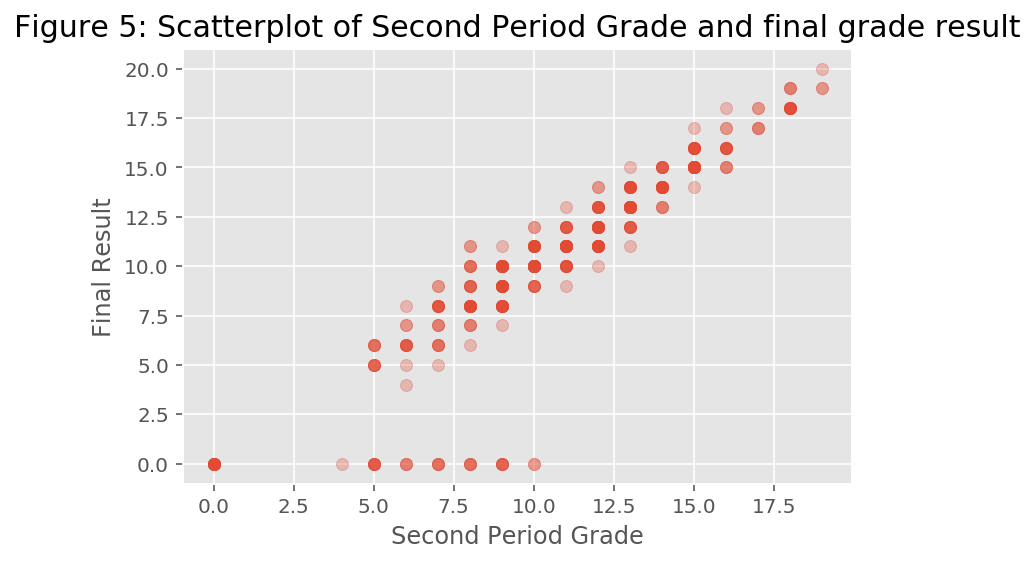

In [15]:

# get a scatter plot
plt.scatter(data['G2'], data['G3'], alpha = 0.3)
plt.title('Figure 5: Scatterplot of Second Period Grade and final grade result', fontsize = 15)
plt.xlabel('Second Period Grade')
plt.ylabel('Final Result')
plt.show();

We can already observe there seems to be a linear relationship between the final grade and previous semester grade results from figure 5

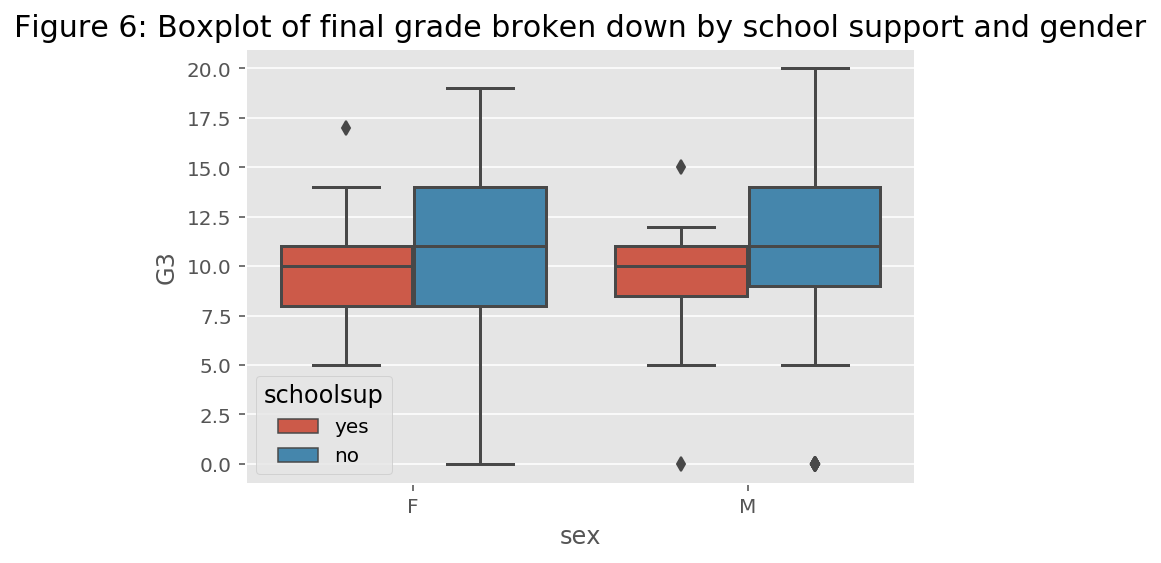

In [16]:
# Getting the index of the sexes of the students
gender_mask = data['sex'].isin(['F','M'])

# Getting the index of those who have recieved school support
school_sup_mask = (data['schoolsup'].isin(['yes','no'])) 

education_relationship = data[(gender_mask & school_sup_mask)]

# Creating the boxplot
sns.boxplot(data['sex'], data['G3'], 
            hue = data['schoolsup'])
plt.title('Figure 6: Boxplot of final grade broken down by school support and gender', fontsize = 15)
plt.show();

In figure 6 we have a boxplot of final grades broken down by gender and if the student received school support to help with their study.

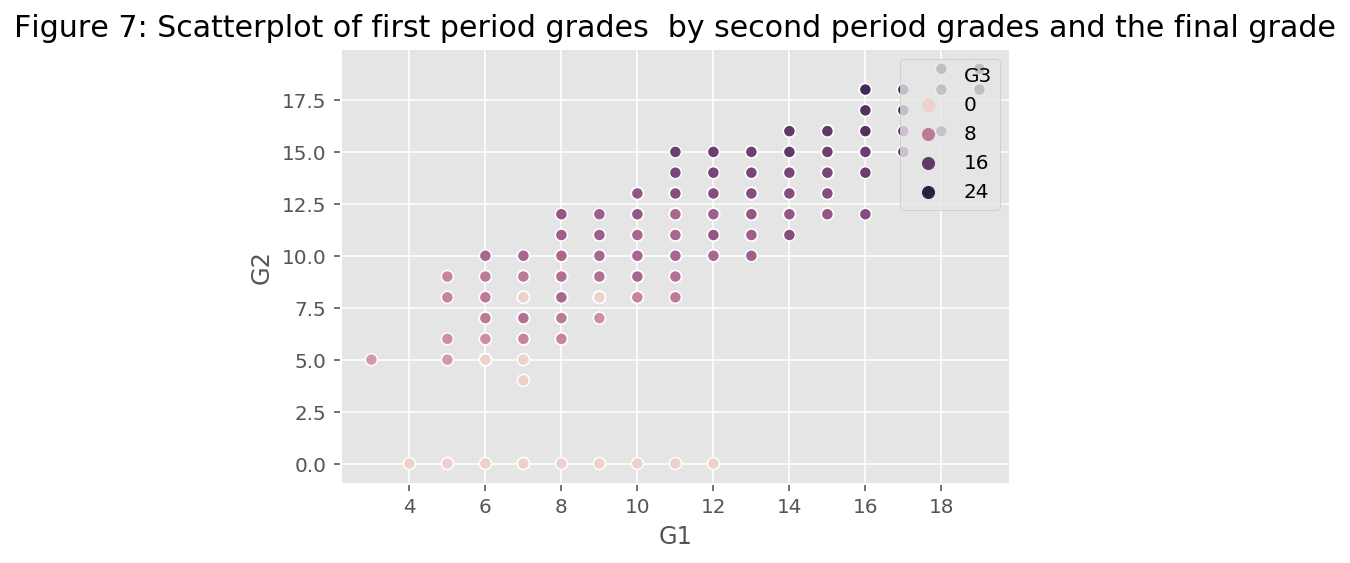

In [17]:
# creating a scatterplot
sns.scatterplot(data['G1'], data['G2'], hue = data['G3'] )
plt.title('Figure 7: Scatterplot of first period grades  by second period grades and the final grade', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

In figure 7 from the scatterplot we can see that the linear relationship between final grade continues to the first and second grade and we can roughly presume there is a strong linear relationship of approximately r > 0.7.


## Statistical Modeling and Performance Evaluation

We will start using all the available variables to predict final grade in our multiple linear regression.

In [18]:
# short and sweet
formula_string_indep_vars = ' + '.join(data.drop(columns='G3').columns)
formula_string_indep_vars = ' + '.join(data.drop(columns='famsize').columns)
formula_string_indep_vars = ' + '.join(data.drop(columns='Mjob').columns)
formula_string = 'G3 ~ ' + formula_string_indep_vars
formula_string_encoded = 'G3 ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string_encoded)

formula_string:  G3 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + famsup + paid + activities + nursery + higher + internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + G1 + G2 + G3


This string will construct the basis of our formula for predicting a student’s final grade

In [19]:
# one-hot-encoding of categorical features
# for this to work correctly, variable data types (numeric or categorical)
# must be correctly specified within the Pandas dataframe
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [20]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='G3').columns)
formula_string_encoded = 'G3 ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  G3 ~ age + Medu + Fedu + traveltime + studytime + failures + famrel + freetime + goout + Dalc + Walc + health + absences + G1 + G2 + school_MS + sex_M + address_U + famsize_LE3 + Pstatus_T + Mjob_health + Mjob_other + Mjob_services + Mjob_teacher + Fjob_health + Fjob_other + Fjob_services + Fjob_teacher + reason_home + reason_other + reason_reputation + guardian_mother + guardian_other + schoolsup_yes + famsup_yes + paid_yes + activities_yes + nursery_yes + higher_yes + internet_yes + romantic_yes


In [21]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     47.21
Date:                Sun, 01 Nov 2020   Prob (F-statistic):          7.20e-119
Time:                        22:38:30   Log-Likelihood:                -791.99
No. Observations:                 395   AIC:                             1668.
Df Residuals:                     353   BIC:                             1835.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1155      2.11

The current model contains an adjusted R square value of 0.828 which signifies that the model accounts for approximately 83% of the variance. This is quite a good result for our first model. Although looking at the data we can observe there are quite a few numbers of unsignificant p values. So, if we remove some, we could have a clearer model.

In [22]:
residuals_full = pd.DataFrame({'actual': data_encoded['G3'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,6,5.140785,0.859215
1,6,4.029681,1.970319
2,10,7.891701,2.108299
3,15,13.129122,1.870878
4,10,8.966265,1.033735
5,15,16.488671,-1.488671
6,11,11.612549,-0.612549
7,6,4.367385,1.632615
8,19,18.524072,0.475928
9,15,15.261263,-0.261263


Plotting the models predicted g3 grades againest actual g3 grades.

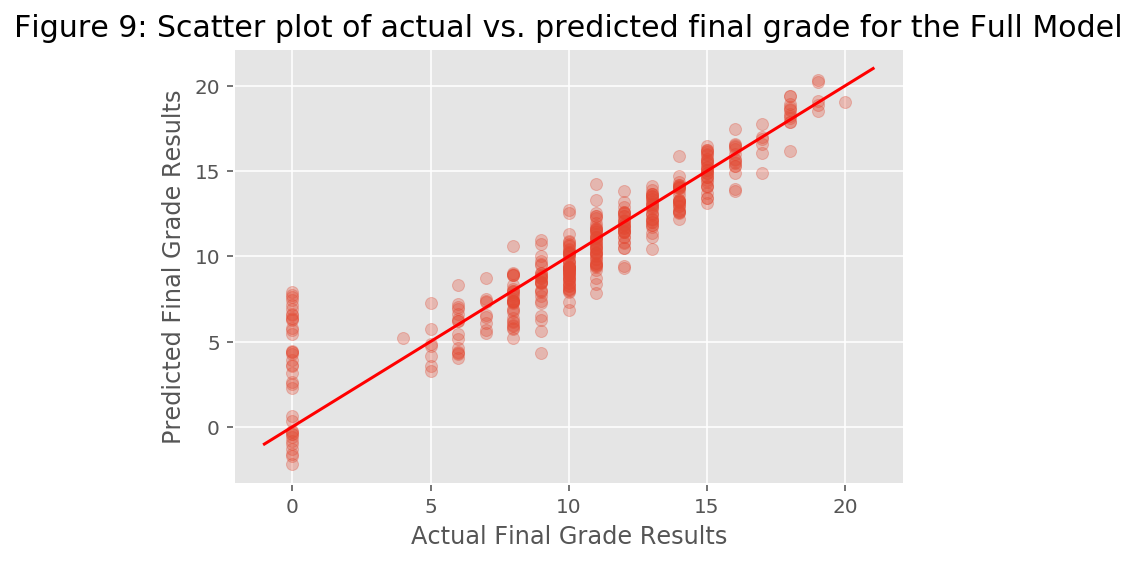

In [23]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Final Grade Results');
plt.ylabel('Predicted Final Grade Results');
plt.title('Figure 9: Scatter plot of actual vs. predicted final grade for the Full Model', fontsize=15);
plt.show();

We can see quite a strong correlation between the predictions and the actual results for the final grade of the students. This quite a good thing to see since it means our initial model has a high accuracy. Unfortunately, the model has also predicted a value over 20. Which is not possible so well will have to do some checks.

## Full Model Diagnostic Checks

For our checks we will have to see if there have been any violations of our assumptions that have been made in our regression.
1. linearity of the relationship between target variable and the independent variables
2. constant variance of the errors
3. normality of the residual distribution
4. statistical independence of the residuals

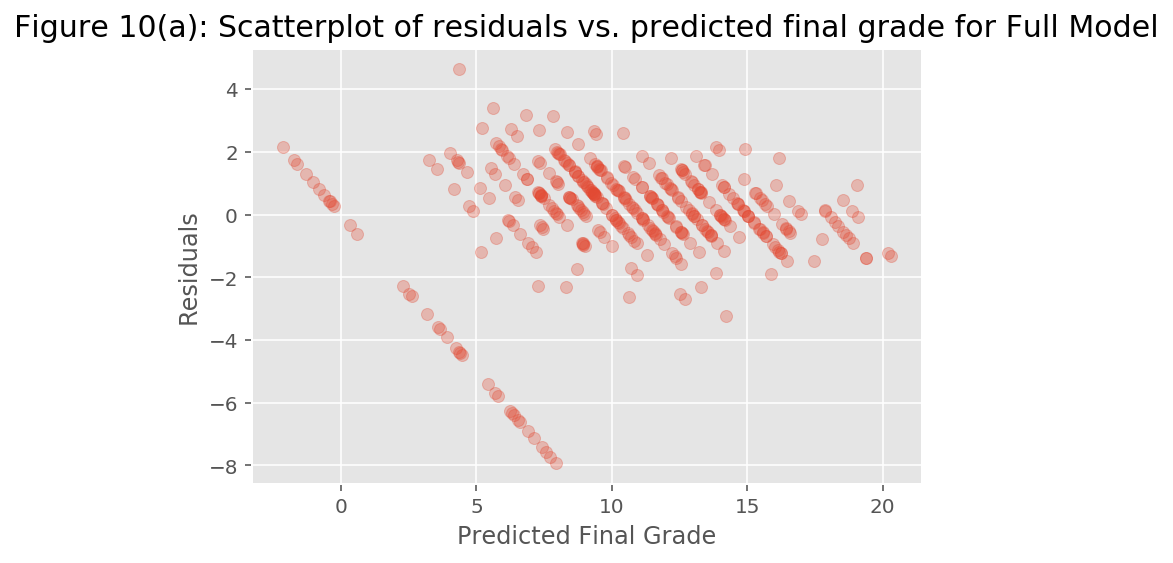

In [24]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Final Grade');
plt.ylabel('Residuals')
plt.title('Figure 10(a): Scatterplot of residuals vs. predicted final grade for Full Model', fontsize=15)
plt.show();

From figure (). We can observe that when the residuals are around 0 there seems to be a strange diagonal shape in the data when the final grade is less 7.5. Due to the existence of a pattern in the residuals we can assume this does not exactly match our condition of constant variability. Now lets check a plot of the actual final grade vs the residuals

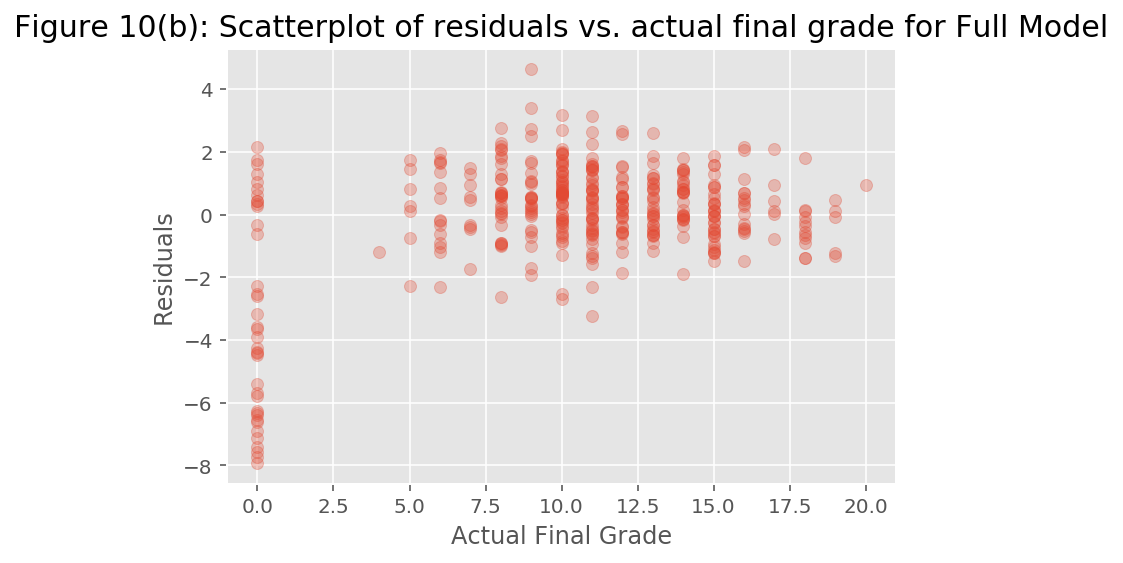

In [25]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Final Grade');
plt.ylabel('Residuals')
plt.title('Figure 10(b): Scatterplot of residuals vs. actual final grade for Full Model', fontsize=15)
plt.show();

We can observe from the figure() that the model has some issues for those with low grades, and under predicts those with a lower grade. While the rest of the data looks quite good and constant in terms of residuals

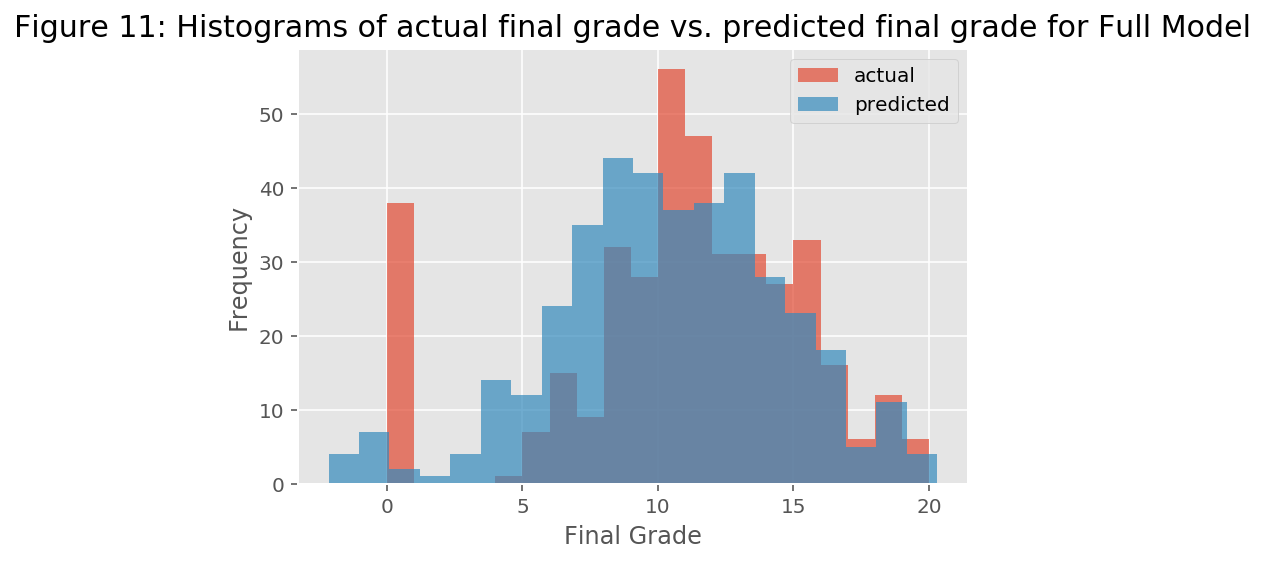

In [26]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Final Grade');
plt.ylabel('Frequency');
plt.title('Figure 11: Histograms of actual final grade vs. predicted final grade for Full Model', fontsize=15);
plt.legend()
plt.show();

The distributions are quite similar except that the actual grades have a cluster around the zero mark. Now we'll have a look at the histogram of the residuals.

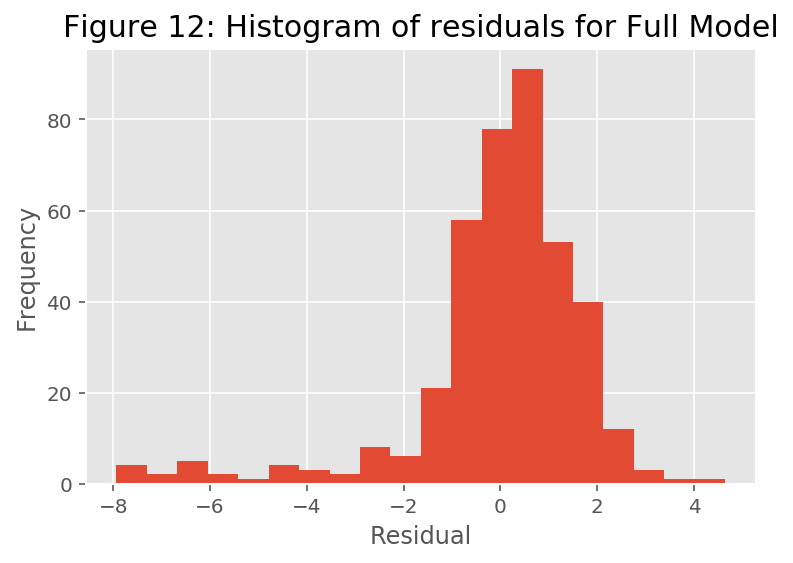

In [27]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 12: Histogram of residuals for Full Model', fontsize=15);
plt.show();

## Backwards Feature Selection

Backwards feature selection will be done on the data set using our p-values. This will go backwards and keep removing features that have a high p-value that doesn't help the model to predict the final grade results.

In [28]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "guardian_other" with p-value 0.9887

Removing term "Mjob_teacher" with p-value 0.957

Removing term "goout" with p-value 0.9058

Removing term "famsize_LE3" with p-value 0.8779

Removing term "Fjob_other" with p-value 0.8544

Removing term "Fjob_teacher" with p-value 0.9142

Removing term "Mjob_services" with p-value 0.8187

Removing term "Mjob_other" with p-value 0.822

Removing term "paid_yes" with p-value 0.7528

Removing term "Pstatus_T" with p-value 0.6665

Removing term "address_U" with p-value 0.6473

Removing term "internet_yes" with p-value 0.6574

Removing term "freetime" with p-value 0.6371

Removing term "traveltime" with p-value 0.6272

Removing term "reason_reputation" with p-value 0.6229

Removing term "Mjob_health" with p-value 0.6272

Removing term "higher_yes" with p-value 0.6033

Removing term "reason_other" with p-value 0.5458

Removing term "sex_M" with p-value 0.5003

Removing term "nursery_ye

We have removed a significant number of features from our model that contained high p-values the result is a much more simplified model that can use to predict final grades values. A new data frame will be made using the new simplified model.

In [29]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['G3'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,6,4.641163,1.358837
1,6,4.134732,1.865268
2,10,7.692765,2.307235
3,15,14.118109,0.881891
4,10,9.027317,0.972683
5,15,15.958202,-0.958202
6,11,11.756458,-0.756458
7,6,4.022736,1.977264
8,19,18.458168,0.541832
9,15,15.565396,-0.565396


Looking at the new model and the predicted results. We still can observe that there is a trend to under predict low grades and slightly over predict high ones. Now let's revaluate our model with a scatterplot.

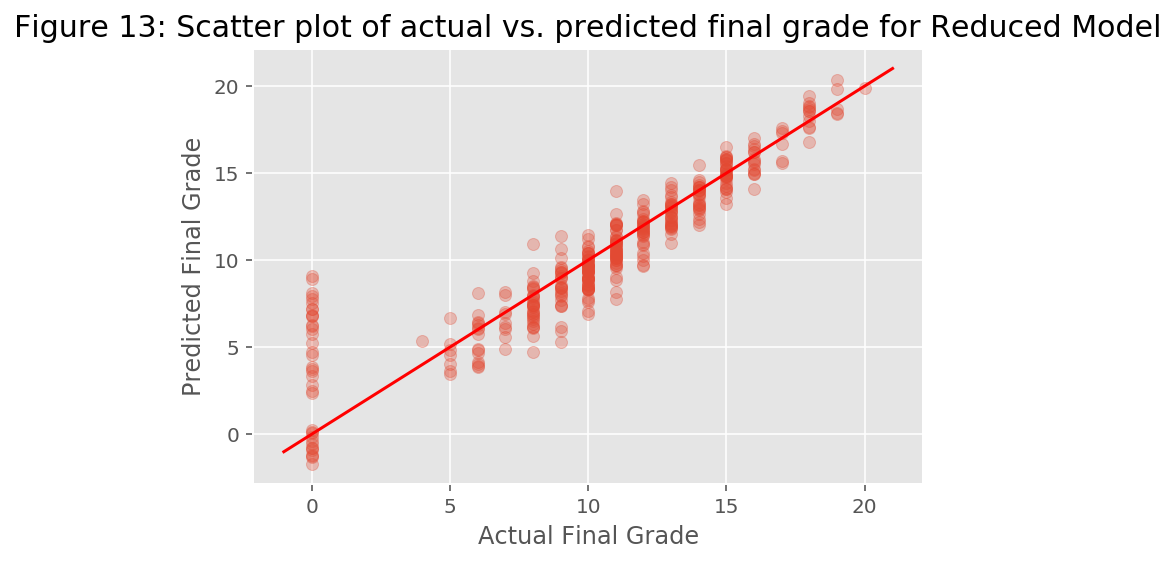

In [30]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Final Grade');
plt.ylabel('Predicted Final Grade');
plt.title('Figure 13: Scatter plot of actual vs. predicted final grade for Reduced Model', fontsize=15);
plt.show(); 

Our new model has an adjusted R-squared value of 0.8336, therefore our model effectively still explains 83% of the variance of the data but has removed many variables that did not have much significance to the previous model. We still have the issues that the model underpredicts low grades and slightly overpredicts higher grades. But now with a much more simplified model we can be quite pleased with how simple it is now in comparison to the previous model.

## Reduced Model Diagnostic Checks

We'll now have a check of the diagnostics of the reduced model to see if they maintain our linear regression assumptions and have the same tendencies of our previous model.

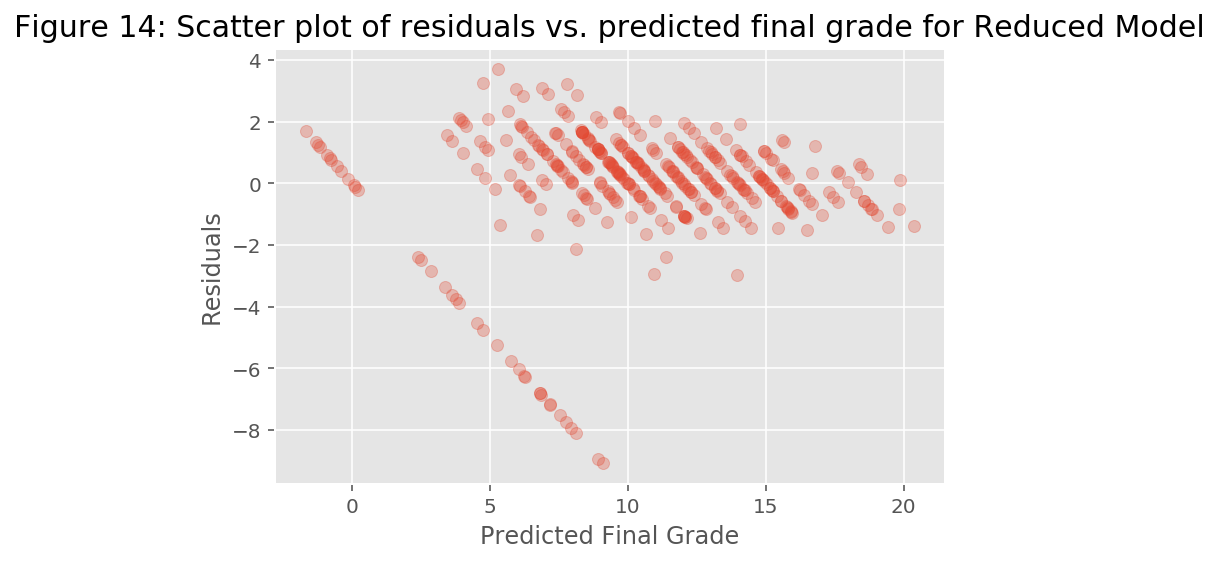

In [31]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Final Grade');
plt.ylabel('Residuals')
plt.title('Figure 14: Scatter plot of residuals vs. predicted final grade for Reduced Model', fontsize=15)
plt.show();

Figure () looks almost identical to our previous models scatterplot which can be seen in Figure ** . Now we'll compare the distribution of the new model.

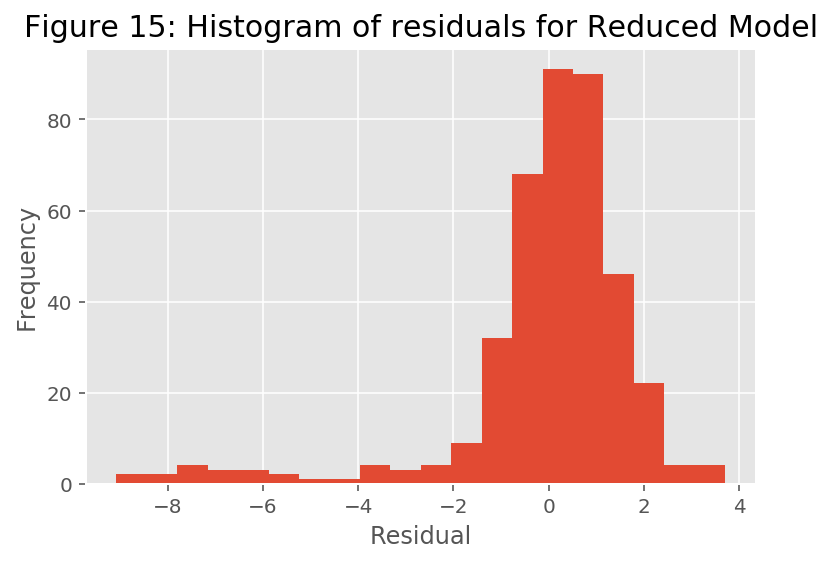

In [32]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 15: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Figrue () is still left-skewed  although the skewnesses has slightly moved over to the left in comparision to figure **, but it is mostly the same.

## Summary and Conclusions

Using our independent variables, we were able to establish a full model with an Adjusted R-square value of approximately 83%. We then performed backwards variable selection and reduced our model to only have 5 variables which made our model extremely simplified and easier to understand and use. When doing diagnostic checks with residual scatter plots, we observed there was an underprediction of low grades and a slight over prediction of high grades. Since our model has such a high Adjusted R-square 83% of the variance can be explained with the model which is quite great. I think to further improve on this model if there was more academic assessment data gathered, we could factor that into the model and have a stronger model that can predict final grades with an even higher accuracy. Unfortunately, our model does sometimes predict a score higher than the max grade a person can achieve this can be ironed out with further fine tuning and adjustments. But asides from those small issues we have a model that can strongly predict the final grade of a student with a few variables.

## References 

Cortez, P. (2014, November 27). UCI Machine Learning Repository: Student Performance Data Set. UCI Machine Learning Repository. http://archive.ics.uci.edu/ml/datasets/Student+Performance

Regression Case Study. (n.d.). Www.Featureranking.Com. Retrieved October 28, 2020, from https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/